# Regression - Real Estate in Rishon Lezion

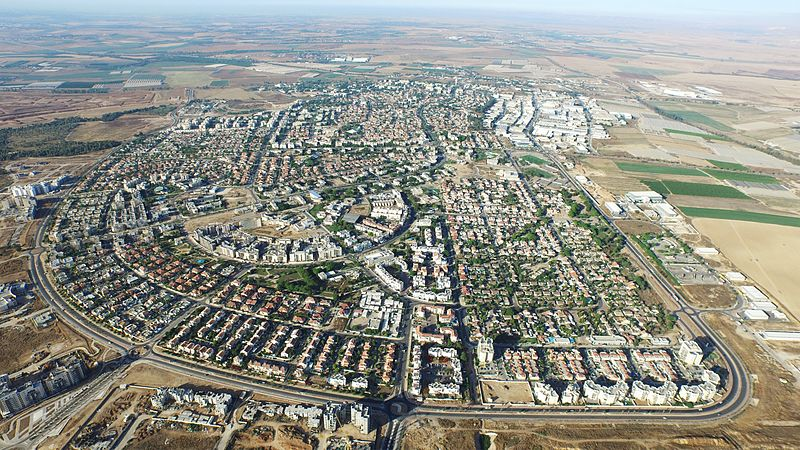

## Main Goal

Predict the price of an apartment according to the details it has.

This model has a lot of importance to us, because we need to buy an apartment soon or later.. and this project helped us to understand the basics of real estate.

In [1]:
# Importing the neccesary libraries
import sys
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

The csv file that we created from web scraping

In [2]:
df = pd.read_csv('C:/Users/matan/Data Science Project/Rishon_Lezion_Nadlan.csv')

In [3]:
df.shape

(25837, 10)

In [4]:
df.head()

,index,Year sold,Month sold,Day sold,Street,Kind,Number of rooms,Floor,Squared meter,Price
0,0,2021,12,20,נירים,דירה בבית קומות,6.0,6.0,134.60,3670000
1,1,2021,12,19,קרל נטר,דירה בבית קומות,3.0,3.0,81.00,1770000
2,2,2021,12,16,יהודה הלוי,דירה בבית קומות,5.0,5.0,120.00,2400000
3,3,2021,12,15,שרירא שמואל,דירה בבית קומות,4.0,2.0,64.32,2050000
4,4,2021,12,15,"תרמ""ב",דירה בבית קומות,3.0,3.0,80.98,1640000


In [5]:
# removing the unnecesary columns
df.pop('index')

0            0
1            1
2            2
3            3
4            4
         ...  
25832    25832
25833    25833
25834    25834
25835    25835
25836    25836
Name: index, Length: 25837, dtype: int64

## Details explanation:

 * **Year sold**- The year the apartment has been sold.
 * **Month sold**- The month the apartment has been sold.
 * **Day sold**- The day the apartment has been sold.
 * **Street**- The apartment's street.
 * **Street Number**- The apartment's street number.
 * **Number of rooms**- Number of rooms the apartment has.
 * **Floor**- The apartment's floor level.
 * **Squared meter**- The apartment size.
 * **Price**- The apartment price when it was sold.

In [6]:
df.isnull().sum()
# We have no null values,
# That's because we already fixed it the 'Web Scraping' notebook.

Year sold          0
Month sold         0
Day sold           0
Street             0
Kind               0
Number of rooms    0
Floor              0
Squared meter      0
Price              0
dtype: int64

## Changing from text to numerical
Replace text to integers in column 'Kind' by levels

In [7]:
df["Kind"].replace({"דירה": "1", "דירה בבית קומות": "1"}, inplace=True)
df["Kind"].replace({"דירת גן": "2"}, inplace=True)
df["Kind"].replace({"דירת גג": "3", "דירת גג (פנטהאוז)": "3"}, inplace=True)
df["Kind"] = df["Kind"].astype('int64')

## Basic ploting

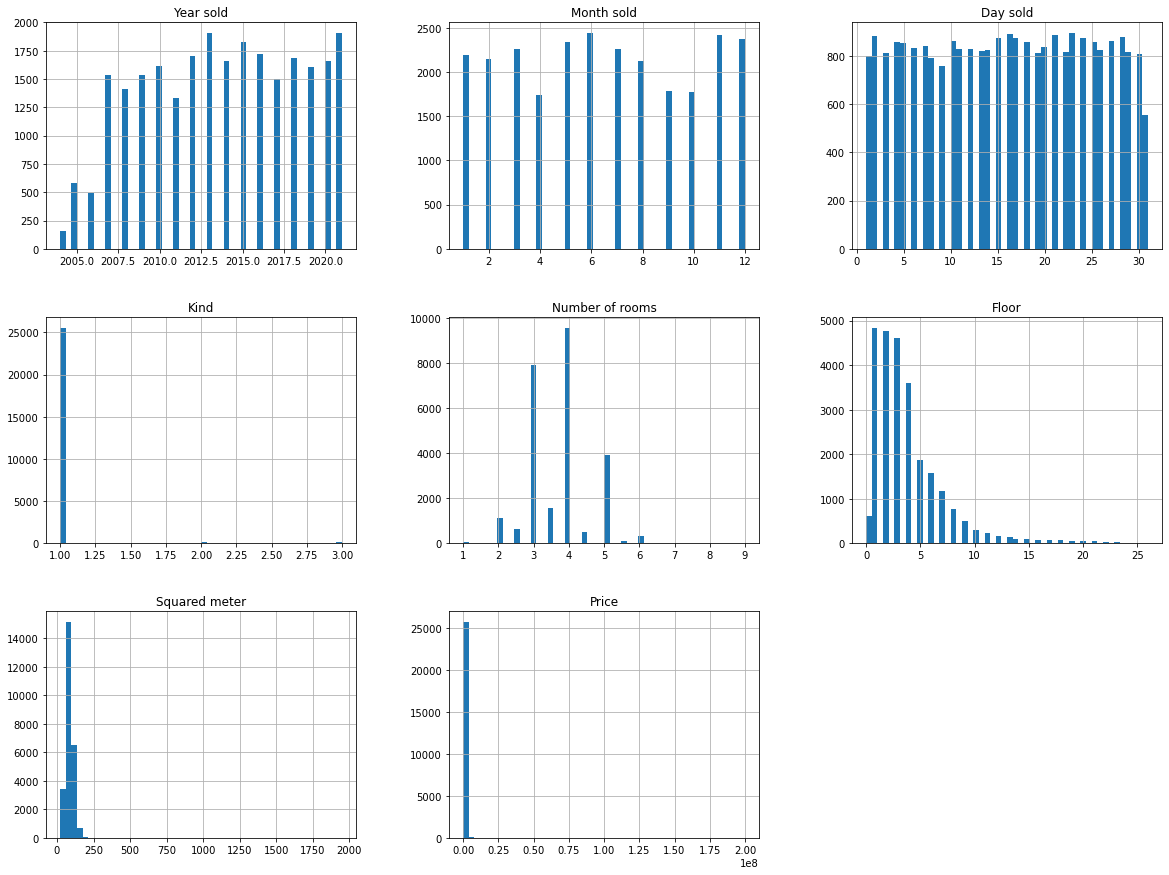

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

As we can see from the above, we have some data in the outliers.

This data is not presenting the ideal apartment details, and therfore, it can make our moedl unstable.

For this reason (model better result) we will clean the outliers.

## Cleaning outliers

In [9]:
df = df.loc[df['Year sold'] >= 2005]
df = df.loc[df['Floor'] < 10]
df = df.loc[(df['Number of rooms'] >= 2) & (df['Number of rooms'] <= 5)]
df = df.loc[df['Squared meter'] < 250]
df = df.loc[df['Price'] < 10000000]

In [10]:
# The reason we did not clean the outliers of 'Kind', it's because it will keep us only with 1 value for 'Kind' (1).
# This data didn't provide us a thing (make sense, because there is a column in the df that has only one value).
# And therefore, we preffered to remove this column.
df.pop('Kind')

1        1
2        1
3        1
4        1
5        1
        ..
25675    1
25676    1
25677    1
25678    1
25679    1
Name: Kind, Length: 23715, dtype: int64

Ploting again to check if there are more specific outliers

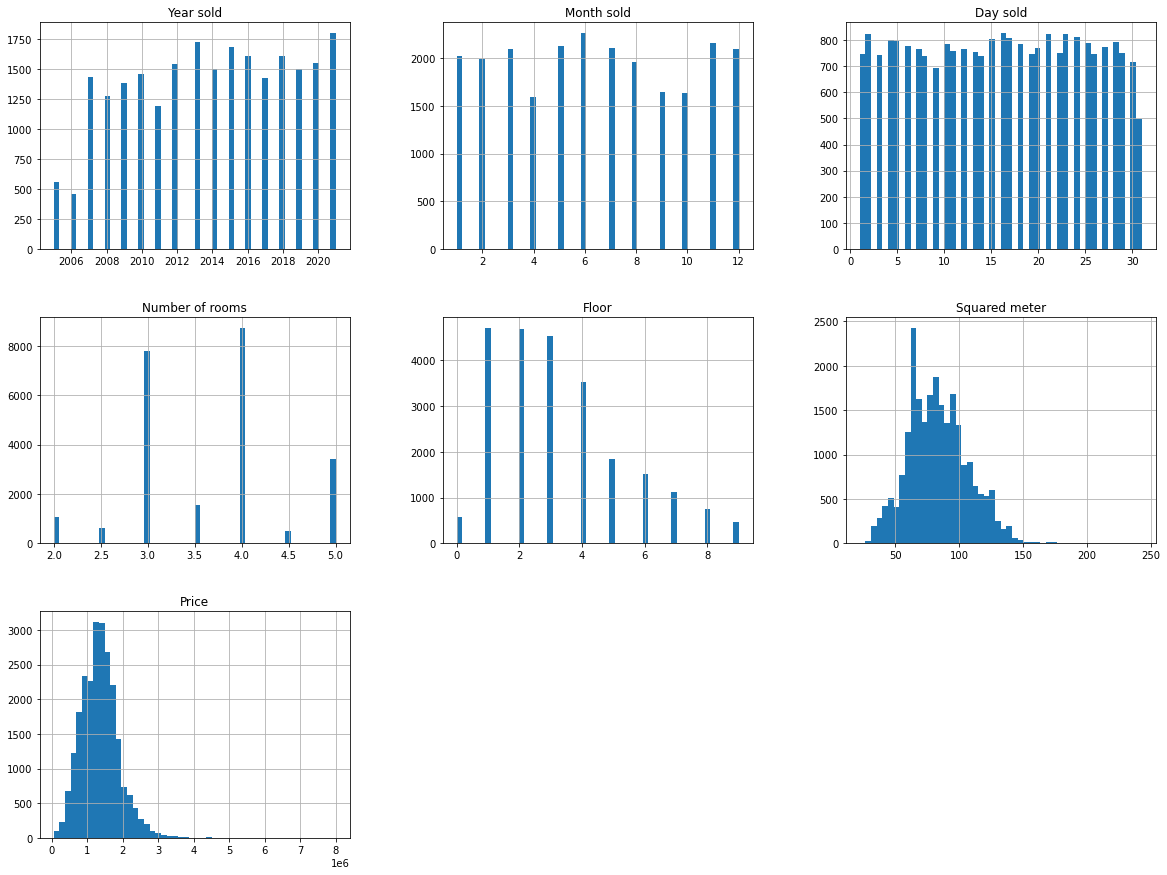

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Cleaning outliers again (more specific)

In [12]:
df = df.loc[(df['Squared meter'] <= 150) & (df['Squared meter'] >= 25)] 
df = df.loc[df['Price'] < 3000000]

Let's check which street is generally more expensive by using 'GroupBy' method on the 'Street' column.

In [13]:
streets = df.groupby(['Street']).agg({'Price':'sum','Street':'count'}).rename(columns={'Street':'num_of_apartments'})

In [14]:
streets['Average'] = streets['Price'] / streets['num_of_apartments']

In [15]:
streets.sort_values('Average', ascending = False)

,Price,num_of_apartments,Average
Street,,,
האגס,2999000,1,2.999000e+06
גלילי ישראל,138378000,53,2.610906e+06
הקנאים,2600000,1,2.600000e+06
"מיש""ר",26908000,11,2.446182e+06
הנביאים,4800000,2,2.400000e+06
...,...,...,...
צמיר אלימלך,1180000,2,5.900000e+05
דניאל הנביא,510000,1,5.100000e+05
רבי עקיבא,477000,1,4.770000e+05


Note: The data has no equal number of apartments in each Street.

So basically we can't conclude from that which streets are the most elite.

Let's check which the average price each year using 'GroupBy'.

In [16]:
years = df.groupby(['Year sold']).agg({'Price':'sum','Year sold':'count'}).rename(columns={'Price':'Total price','Year sold':'num_of_apartments'})

In [17]:
years['Average'] = years['Total price'] / years['num_of_apartments']

In [18]:
years.sort_values('Average', ascending = False)

,Total price,num_of_apartments,Average
Year sold,,,
2021,3076313717,1756,1.751887e+06
2020,2511905000,1522,1.650398e+06
2019,2424818499,1485,1.632874e+06
2018,2578045585,1581,1.630642e+06
2017,2270693056,1400,1.621924e+06
2016,2439667420,1595,1.529572e+06
2015,2373992071,1672,1.419852e+06
2014,2026816315,1489,1.361193e+06
2013,2254710902,1705,1.322411e+06


As we thought, each year (except 2005 and 2006 that has less selling data, we can assume that those years has less data because they are older) is more expensive in average than the last year.

We can assume with that data that the prices will still goes up in average, means that it is worth buying an apartment in Rishon Lezion now (unless something extreme will happen).

## Correlation matrix

The correlation matrix (heatmap) is so important because from it we can see which columns are more correlated to others, And in particular, to the 'Price' column.

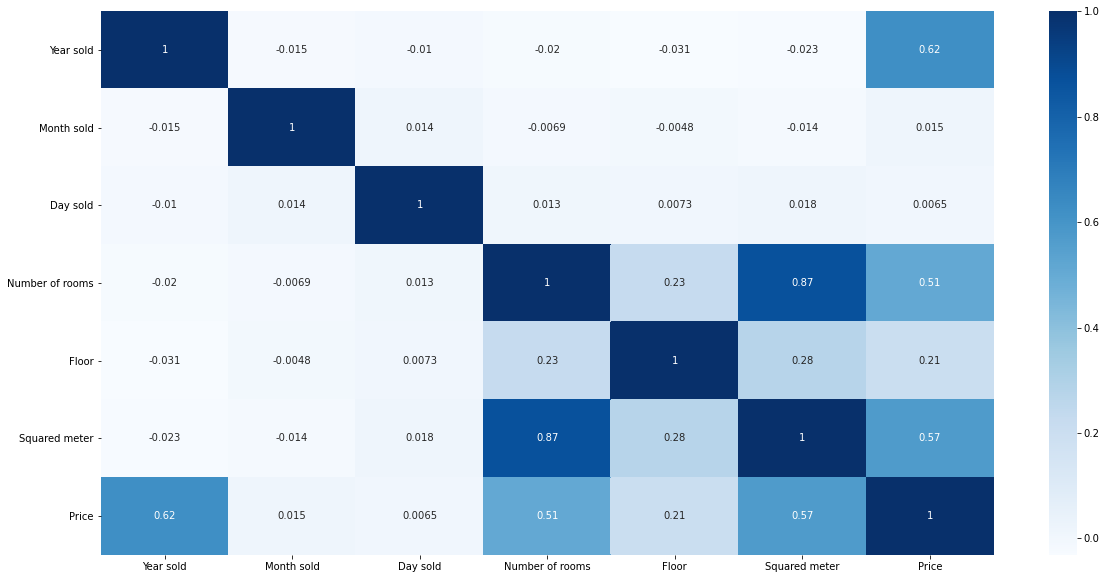

In [19]:
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(), cmap = 'Blues', annot=True);

From the heatmp we can see that the 'Month sold' and 'Day sold' columns are not correlated to the 'Price' column.

While the 'Floor' has some correlation to the 'Price', but not strong like the correlation between 'Year sold', 'Squared meter', 'Number of rooms' and 'Price'.

Note: we tried several approaches, the best of them was to 'pop' the uncorrelateed columns.

In [20]:
# deleting those columns
df.pop('Month sold')
df.pop('Day sold')

1        19
2        16
3        15
4        15
5        14
         ..
25675     4
25676     4
25677     3
25678     3
25679     3
Name: Day sold, Length: 23475, dtype: int64

Note: we checked several options (removing the steet column, giving each street a unique number, ...).

The best of them was the one with 'get_dummies' function on the 'Street' column.

In [21]:
df_with_street_dummies = pd.get_dummies(df, columns = ['Street'], prefix = '', prefix_sep = '')

In [22]:
df_with_street_dummies.head()

,Year sold,Number of rooms,Floor,Squared meter,Price,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,אברבנאל,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
1,2021,3.0,3.0,81.00,1770000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,5.0,5.0,120.00,2400000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,4.0,2.0,64.32,2050000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2021,3.0,3.0,80.98,1640000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2021,4.0,2.0,86.44,1710000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalization

Before we split the data into train and test sets, we must normalize the values.

The normalization will only be done on the values which will be given in the future for prediction (everything except the price).

We dont need to normalize all of the streets attributes because they already have only 0 and 1 values.
We choose normalization and not standardization due to standardization giving less weight to the outliers of the dataframe.

In [23]:
num_features = ['Year sold', 'Number of rooms', 'Floor', 'Squared meter']
basic_scale = MinMaxScaler()
df_with_street_dummies[num_features] = basic_scale.fit_transform(df_with_street_dummies[num_features])

### Spliting the data into train and test parts

Now that the data is normalized, we can split it.

The method splits the data according to a random state (an integer), so that over multiple reruns, the resulting dataframes from the method remain the same (we chose random state 7).

The test size is set to the standard (20%).

In [24]:
prices = df_with_street_dummies['Price']
data_without_prices = df_with_street_dummies.drop(['Price'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(data_without_prices, prices, test_size=0.2, random_state = 7)

In [25]:
X_train.head()

,Year sold,Number of rooms,Floor,Squared meter,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,אברבנאל,אברמוביץ,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
11617,0.6250,0.166667,0.111111,0.231719,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19611,0.3125,0.666667,0.222222,0.422599,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9964,0.6875,0.333333,0.111111,0.152542,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4945,0.8750,0.666667,0.222222,0.489911,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25086,0.0625,0.666667,0.333333,0.671994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train.describe()

,Year sold,Number of rooms,Floor,Squared meter,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,אברבנאל,אברמוביץ,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
count,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,...,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000,18780.000000
mean,0.556190,0.549308,0.363963,0.458005,0.000745,0.002290,0.001917,0.001384,0.009744,0.002236,...,0.001384,0.010969,0.001704,0.001278,0.004100,0.005591,0.009691,0.000373,0.005485,0.000799
std,0.286212,0.260641,0.231004,0.183453,0.027294,0.047797,0.043742,0.037183,0.098234,0.047239,...,0.037183,0.104160,0.041245,0.035727,0.063902,0.074566,0.097968,0.019303,0.073856,0.028251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.312500,0.333333,0.222222,0.317191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,0.666667,0.333333,0.446651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.812500,0.666667,0.444444,0.580186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see from above, the std for the columns: 

'Number of rooms' and 'Floor' is low - means that almost all of the data is of those columns are near the column average (make sense). 

'Year sold' is little bit higher - means that most of the data in this column are near the column average (make sense because we have more options in 'Year sold').

'Squared meter' is much more higher - means that a lot of the is not close to the column average (again, make sense because we have a tons of options for 'Squared meter').

### Train plot 

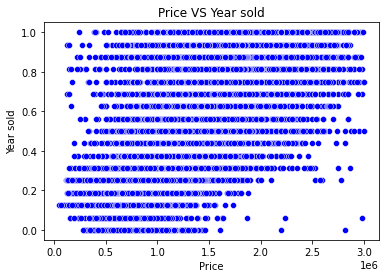

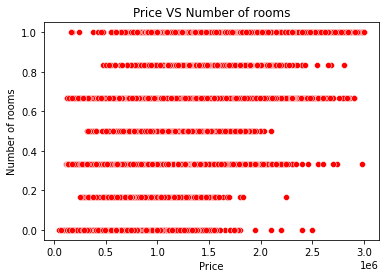

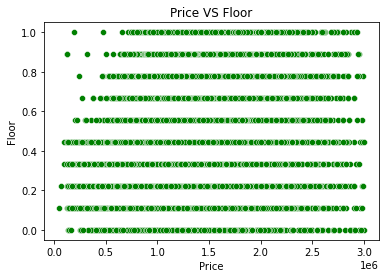

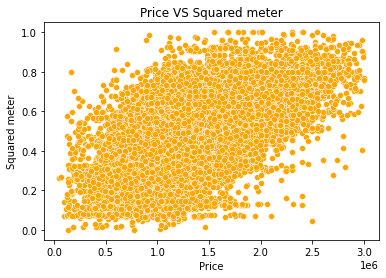

In [27]:
sb.scatterplot(x = y_train, y = X_train['Year sold'], color='blue')
plt.title("Price VS Year sold")
plt.show()

sb.scatterplot(x = y_train, y = X_train['Number of rooms'], color='red')
plt.title("Price VS Number of rooms")
plt.show()

sb.scatterplot(x = y_train, y = X_train['Floor'], color='green')
plt.title("Price VS Floor")
plt.show()

sb.scatterplot(x = y_train, y = X_train['Squared meter'], color='orange')
plt.title("Price VS Squared meter")
plt.show()

As we can see from the above, the only that directly correlated with the 'Price' column is the 'Squared meter' column.

The 'Year sold' and 'Number of rooms' columns are also correlated to the 'Price' column, but we can still see a lot of different prices in each of them.

As we saw earlier in the heatmap, the 'Year sold' column has the most correlation to the 'Price', but from basic logic and from the graphs, we can see that in each year there is a lot of apartments sold in different prices (with high gap). yet, the average per year is increasing because of the market value in out country.

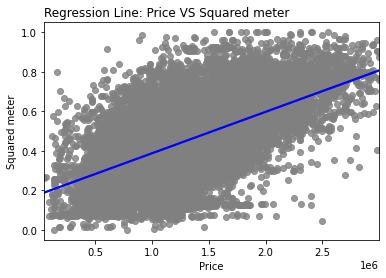

In [28]:
ax = sb.regplot(x=y_train, y=X_train["Squared meter"], fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Squared meter", color="black", loc='left');

As we thought, we can see from the graph the 'Price' goes up while the 'Squared meter' goes up.

In [29]:
X_train_train,X_train_test,y_train_train,y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state = 7)

### Models

#### Dummy Regressor
The Dummy Regressor is a kind of Regressor that gives prediction based on simple strategies without paying any attention to the input Data.

##### 1) Median approach

In [30]:
dummy_reg_by_median = DummyRegressor(strategy="median")
dummy_reg_by_median.fit(X_train_train, y_train_train)
pred = dummy_reg_by_median.predict(X_train_test) 

print("score: ",dummy_reg_by_median.score(X_train_test, y_train_test))
print("r^2 score: ",metrics.r2_score(y_train_test, pred))
print("MAE: ", metrics.mean_absolute_error(y_train_test, pred))
print ("RMSE: ",mean_squared_error(y_train_test, pred))

score:  -0.004183125599569459
r^2 score:  -0.004183125599569459
MAE:  392374.44142705004
RMSE:  247898585709.61182


In [31]:
# Cross validation
dummy_reg_by_median_scores = cross_val_score(DummyRegressor(strategy="median"), X_train, y_train, cv=10,scoring="neg_mean_squared_error")
dummy_reg_by_median_scores_r2 = cross_val_score(DummyRegressor(strategy="median"),X_train, y_train,cv=10,scoring="r2")
dummy_median_err = np.sqrt(-dummy_reg_by_median_scores.mean())

print("After cross validation\n")
print("r^2 score: ",dummy_reg_by_median_scores_r2.mean())
print ("RMSE: ",dummy_median_err)

After cross validation

r^2 score:  -0.0012132000154710721
RMSE:  496028.43752929254


##### 2) Mean approach

In [32]:
dummy_reg_by_mean = DummyRegressor(strategy="mean")
dummy_reg_by_mean.fit(X_train_train, y_train_train)
pred = dummy_reg_by_mean.predict(X_train_test)

print("score: ",dummy_reg_by_mean.score(X_train_test, y_train_test))
print("r^2 score: ",metrics.r2_score(y_train_test, pred))
print("MAE: ", metrics.mean_absolute_error(y_train_test, pred))  
print ("RMSE: ",mean_squared_error(y_train_test, pred))

score:  -0.0018597171618004449
r^2 score:  -0.0018597171618004449
MAE:  392069.8348727942
RMSE:  247325015360.67285


In [33]:
# Cross validation
dummy_reg_by_mean_scores = cross_val_score(DummyRegressor(strategy="mean"), X_train, y_train, cv=10,scoring="neg_mean_squared_error")
dummy_reg_by_mean_scores_r2 = cross_val_score(DummyRegressor(strategy="mean"),X_train, y_train,cv=10,scoring="r2")
dummy_mean_err = np.sqrt(-dummy_reg_by_mean_scores.mean())

print("After cross validation\n")
print("r^2 score: ",dummy_reg_by_mean_scores_r2.mean())
print ("RMSE: ",dummy_mean_err)

After cross validation

r^2 score:  -0.0007195814074732354
RMSE:  495905.8596236139


#### Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

In [34]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_train, y_train_train)
pred = linear_reg.predict(X_train_test)

print("score: ",linear_reg.score(X_train_test,y_train_test))
print("r^2 score: ",metrics.r2_score(y_train_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_train_test, pred))
print ("RMSE: ",mean_squared_error(y_train_test,pred))

score:  -1.4920958810804953e+19
r^2 score:  -1.4920958810804953e+19
MAE:  62392060302074.234
RMSE:  3.6834761432795626e+30


In [35]:
# Cross validation
linear_reg_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10,scoring="neg_mean_squared_error")
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train, y_train,cv=10,scoring="r2")
linear_reg_err = np.sqrt(-linear_reg_scores.mean())

print("After cross validation\n")
print("r^2 score: ",linear_reg_scores_r2.mean())
print ("RMSE: ",linear_reg_err)

After cross validation

r^2 score:  -1.363070696571864e+22
RMSE:  5.83534885120075e+16


#### KNN Regressor
KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.

In [36]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_train, y_train_train)
pred = knn_reg.predict(X_train_test)

print("score: ",knn_reg.score(X_train_test,y_train_test))
print("r^2 score: ",metrics.r2_score(y_train_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_train_test, pred))
print ("RMSE: ",mean_squared_error(y_train_test,pred))

score:  0.7681596250237706
r^2 score:  0.7681596250237706
MAE:  166330.20351437703
RMSE:  57233486205.69372


In [37]:
# this function will provide us the best k between 1 to 30
min_error = sys.maxsize
min_k = 10
for k in range(1,31):  
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_train, y_train_train)
    pred = knn_reg.predict(X_train_test)
    rmse = mean_squared_error(y_train_test,pred)
    if rmse < min_error:
        min_error = rmse
        min_k = k
print(f"min k: {min_k}, RMSE: {min_error}")

min k: 5, RMSE: 57233486205.69372


In [38]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_train, y_train_train)
pred = knn_reg.predict(X_train_test)

print("score: ",knn_reg.score(X_train_test,y_train_test))
print("r^2 score: ",metrics.r2_score(y_train_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_train_test, pred))
print ("RMSE: ",mean_squared_error(y_train_test,pred))

score:  0.7681596250237706
r^2 score:  0.7681596250237706
MAE:  166330.20351437703
RMSE:  57233486205.69372


In [39]:
# Cross validation
knn_reg_scores = cross_val_score(KNeighborsRegressor(n_neighbors=5),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
knn_reg_scores_r2 = cross_val_score(KNeighborsRegressor(n_neighbors=5),X_train, y_train, cv=10, scoring="r2")
knn_reg_err = np.sqrt(-knn_reg_scores.mean())

print("After cross validation\n")
print("R2 Score: ",knn_reg_scores_r2.mean())
print ("RMSE: ",knn_reg_err)

After cross validation

R2 Score:  0.7737883383588169
RMSE:  235740.76846317094


#### Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [40]:
rf_reg = RandomForestRegressor(random_state=7)
rf_reg.fit(X_train_train, y_train_train)
pred = rf_reg.predict(X_train_test) 

print("score: ",rf_reg.score(X_train_test,y_train_test))
print("r^2 score: ",metrics.r2_score(y_train_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_train_test, pred))
print ("MSE: ",mean_squared_error(y_train_test,pred))

score:  0.8177289039328608
r^2 score:  0.8177289039328608
MAE:  143082.09199219555
MSE:  44996520832.59818


In [41]:
# Cross validation
rf_reg_scores = cross_val_score(RandomForestRegressor(random_state=7),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
rf_reg_scores_r2 = cross_val_score(RandomForestRegressor(random_state=7),X_train, y_train, cv=10, scoring="r2")
rf_reg_err = np.sqrt(-rf_reg_scores.mean())

print("After cross validation\n")
print("R2 Score: ",rf_reg_scores_r2.mean())
print ("Mean Square ERR: ",rf_reg_err)

After cross validation

R2 Score:  0.8085585198536073
Mean Square ERR:  216818.01875137177


## HyperParameters Tuning

For improvment, we will use GridSearchCV on our best model.

The GridSearchCV chooses parameters between all of the possible combinations we have given in 'param_grid'.

Evantually, we can see which parameters combination gives us the best score.

In [42]:
# number of trees in random forest
n_estimators_list = [100, 500, 1000, 3000]
# number of features to consider at every split
max_features_list = np.arange(0.01,0.2,0.01)
# number of samples
max_samples_list = [0.5,0.75,1.0]
params = {'n_estimators':n_estimators_list,
          'max_features':max_features_list,
          'max_samples':max_samples_list}
grid_model = GridSearchCV(estimator = RandomForestRegressor(random_state=7),
                              param_grid = params,
                              n_jobs = -1,
                              cv = 10)

In [43]:
# fitting the training part
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=7), n_jobs=-1,
             param_grid={'max_features': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [100, 500, 1000, 3000]})

In [44]:
# The best parameters
best_parameters = grid_model.best_params_
print(best_parameters)

{'max_features': 0.04, 'max_samples': 0.75, 'n_estimators': 3000}


In [45]:
# The best score
best_score = grid_model.best_score_
print("score: ",best_score)

score:  0.8383527363293103


In [46]:
# predicting the test itself
pred = grid_model.predict(X_test)
grid_model_err = mean_squared_error(y_test,pred)

print("score: ",grid_model.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,pred))
print("MAE: ",metrics.mean_absolute_error(y_test, pred))
print ("MSE: ",grid_model_err)

score:  0.8226646366209706
r^2 score:  0.8226646366209706
MAE:  134954.28228120843
MSE:  43701622251.94556


# Conclusion

## Models score 

In [47]:
print("Dummy Regressor (by median): ",dummy_median_err," RMSE")
print("Dummy Regressor (by mean): ",dummy_mean_err," RMSE")
print("Linear Regression: ",linear_reg_err," RMSE")
print("KNN Regressor: ",knn_reg_err," RMSE")
print("Random Forest Regressor: ",rf_reg_err," RMSE")

Dummy Regressor (by median):  496028.43752929254  RMSE
Dummy Regressor (by mean):  495905.8596236139  RMSE
Linear Regression:  5.83534885120075e+16  RMSE
KNN Regressor:  235740.76846317094  RMSE
Random Forest Regressor:  216818.01875137177  RMSE


The best model (between the models that we checked) for our dataset is: **Random Forest Reggresor**

After a GridSearchCV we improved it and got the best HyperParameters.

Our test score is: **0.82266**.